<a href="https://colab.research.google.com/github/wintala/Koulu/blob/main/demo3KT35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import statistics as st
from scipy import stats
data = pd.read_csv("/content/CASchools.csv")
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,stratio,score
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909,690.799988
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664,661.200012
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225,643.600006
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143,647.700012
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329,640.850006


## a)

expenditure:
420 records
Min: 3926.06958007812, Max: 7711.5068359375, Mean: 5312.407541038877, Std: 633.9370531095024

income:
420 records
Min: 5.33500003814697, Max: 55.327999114990206, Mean: 15.316588053249179, Std: 7.225889763291426



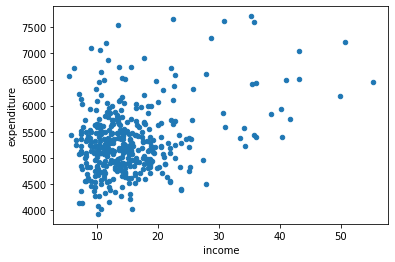

In [11]:
def print_info(column):
  series = data[column]
  minval, maxval = min(series), max(series)
  meanval = st.mean(series)
  deviation = st.stdev(series)
  print(column + ":")
  print(str(len(series)) + " records")
  print(f"Min: {minval}, Max: {maxval}, Mean: {meanval}, Std: {deviation}\n")


print_info("expenditure")
print_info("income")

data.plot(kind="scatter", x="income", y="expenditure")

## b)

In [13]:
income = data["income"].values
exp = data["expenditure"].values

slope, intercept, r_value, p_value, std_err = stats.linregress(income, exp)

print(slope, intercept, r_value, p_value, std_err)
print(slope - 1.96 * std_err, slope + 1.96 * std_err)

27.590147084165658 4889.820623822157 0.31448447508358623 4.285868368789327e-11 4.073362322475143
19.606356932114377 35.573937236216935


Eli regressioksi muodostuu:  
expendure = 4890 + 27.6 * income

Luottamusväli B1:lle:  
[19.6, 35.6]  
eli voimme samalla hylätä nollahypoteesin

## c)
Kun tulotaso kasvaa tuhannella dollarilla kasvavat oppilaskohtaiset menot keskimäärin 27.6 dollaria.  
Tulotaso selittää noin kolmanneksen oppilasmenoissa havaittavasta vaihtelusta.  
Mielestäni on luontevaa että rikkailla alueilla panostetaan enemmän rahaa opillasta kohden.

## d)
Mikäli aineisto on valittu satunnaisesti toteutuvat PNS-oletukset 1 ja 2. Kolmanne toteutumisen näemme datasta koska neljännet momentit ovat ääreellisiä

## e)
Heteroskedastisessa jakumassa virhetermin varianssi riippuu selittävän muuttujan arvosta ja homoskedastisessa jakaumassa ei riipu. 

a-kohdan sirontakuviota katsoessa huomaa pisteiden olevan enemmän hajallaan suuremmilla tulotasoilla eli jakauma on heteroskedastinen

In [30]:
slope, intercept, *_ = stats.mstats.theilslopes(exp, income)
print(slope, intercept)


12.946050977041406 5036.795804352536


Robustissa jakaumassa B0 on suurempi ja kulmakerroin pienenmpi. Ilmeisesti "ei-robustin" regression kulmakerrointa suurensi tulotason loppupään suuuret outlierit